In [86]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-iw_hu7jm
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-iw_hu7jm
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 554c6f13102fd81e129b644e604cc4051be7e6c0


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [199]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,execute,Aer
# import basic plot tools
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [172]:
from qiskit_textbook.problems import dj_problem_oracle

oracles = {dj_problem_oracle(i).name: dj_problem_oracle(i) for i in range(1,5)}
names= [a for a in oracles]
names

['circuit-4585', 'circuit-4591', 'circuit-4597', 'circuit-4603']

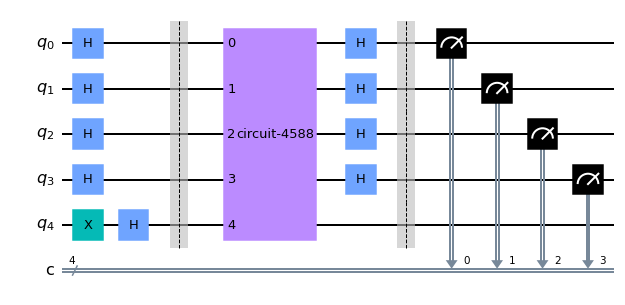

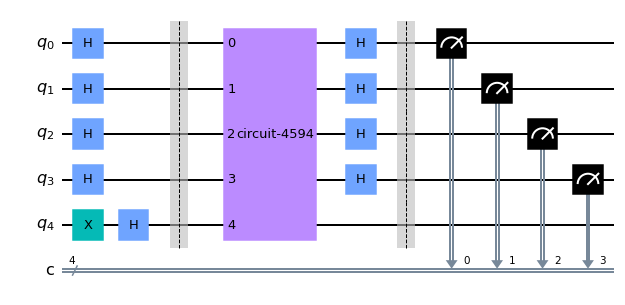

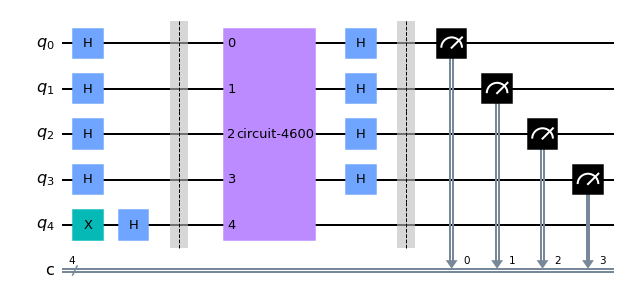

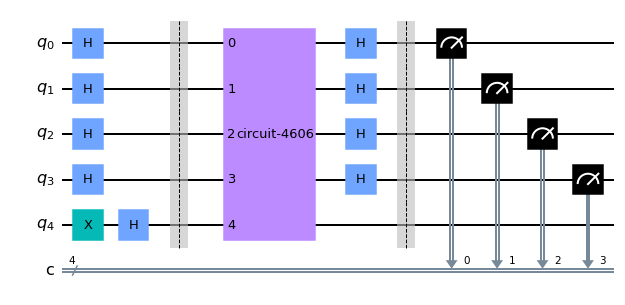

In [210]:
# Set the length of the qubit string
n= 4
def dj_implement(oracle,n):
    dj_circuit = QuantumCircuit(n+1, n)

    # Apply H-gates
    for qubit in range(n):
        dj_circuit.h(qubit)

    # Put qubit in state |->
    dj_circuit.x(n)
    dj_circuit.h(n)

    dj_circuit.barrier()

    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    dj_circuit.barrier()    
    # Measure
    for i in range(n):
        dj_circuit.measure(i, i)
        
    return dj_circuit


dj_circuits = [dj_implement(oracles[name],n) for name in names ]   

# Display circuit

for i in range(4):
    fig = plt.figure(i)
    plt.plot()
    axs  = fig.get_axes()
    dj_circuits[i].draw(output='mpl',ax =axs[0])


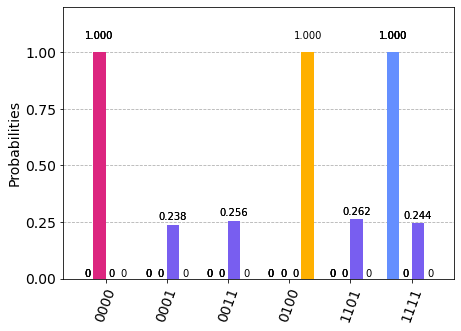

In [212]:
# use local simulator
simulator = Aer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, Repeat circuit= #(shots) times
job = simulator.run(transpile(dj_circuits, simulator))
#測定結果の取り出し
result = job.result()
counts = result.get_counts()

plot_histogram(counts)


In [217]:
# check for the type of oracle
check=['0000'in counts[value] for value in range(4)]
checked = list(zip (counts, tonces))
type = ["balanced", "constant"]



In [218]:
#print the oracle's type
for i,name in enumerate(names):
    print( "oracle: %s"%(name), " type: %s"%(type[checked[i][1]]))
 

oracle: circuit-4585  type: balanced
oracle: circuit-4591  type: constant
oracle: circuit-4597  type: balanced
oracle: circuit-4603  type: balanced


1000